# Lab 2.02 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [4]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

android_persistence = pd.read_csv('../data/android_persistence_cpu.csv', delimiter=";")

# How many variables and observations do we have?
print(android_persistence.shape)

# What is the level of measurement of each variable?
print(android_persistence.dtypes)

# Perform the conversion of the qualitative variables to the appropriate type (and specify the order of ordinal variables).
android_persistence.DataSize.describe()
android_persistence.DataSize = android_persistence.DataSize.astype('category')

android_persistence.PersistenceType.describe()
android_persistence.PersistenceType = android_persistence.PersistenceType.astype('category')

# List the data types in the dataset.
print(android_persistence.dtypes)

android_persistence.head()

(300, 3)
Time               float64
PersistenceType     object
DataSize            object
dtype: object
Time                float64
PersistenceType    category
DataSize           category
dtype: object


,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

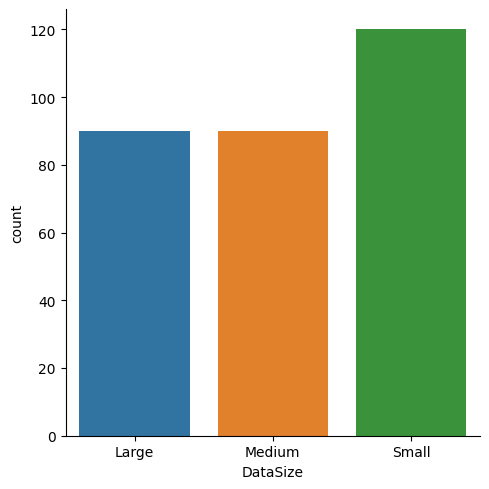

In [6]:
sns.catplot(data = android_persistence, kind="count", x="DataSize")

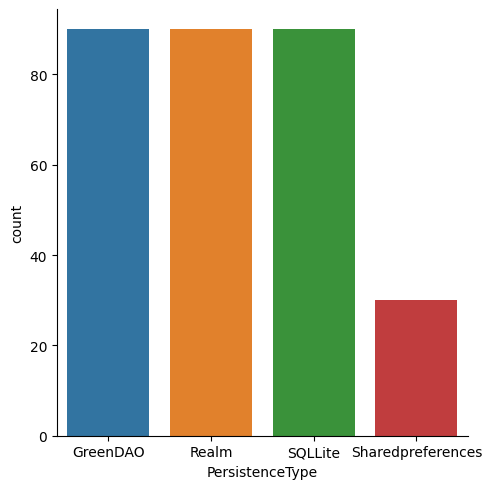

In [7]:
sns.catplot(data = android_persistence, kind="count", x="PersistenceType")

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

<Axes: xlabel='DataSize', ylabel='count'>

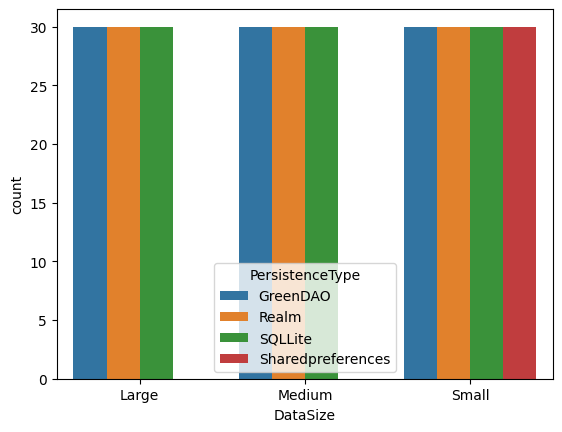

In [14]:
sns.countplot(data = android_persistence, x="DataSize", hue="PersistenceType")

<Axes: xlabel='PersistenceType', ylabel='count'>

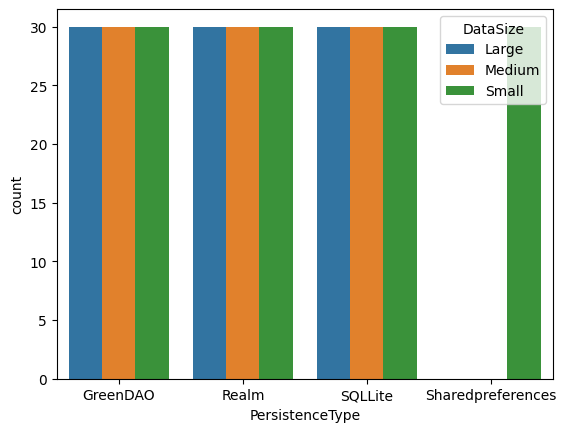

In [15]:
sns.countplot(data = android_persistence, x="PersistenceType", hue="DataSize")

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time'>

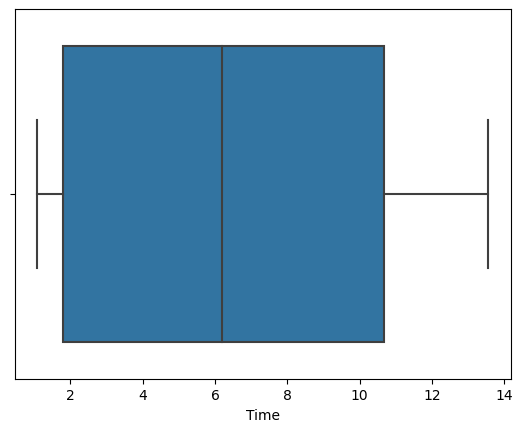

In [16]:
sns.boxplot(data = android_persistence, x="Time")

<Axes: xlabel='Time', ylabel='DataSize'>

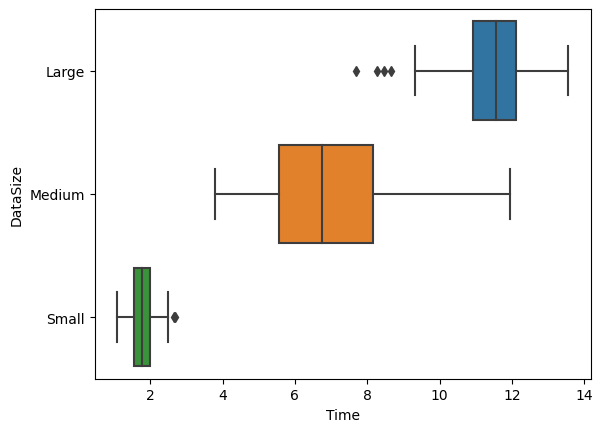

In [17]:
sns.boxplot(data = android_persistence, x="Time", y="DataSize")

<Axes: xlabel='Time', ylabel='DataSize'>

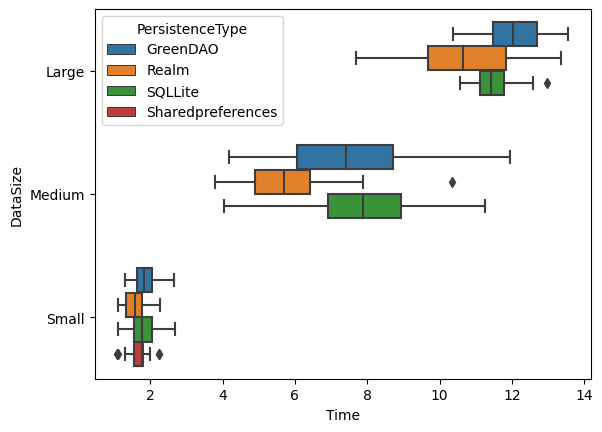

In [20]:
sns.boxplot(data = android_persistence, x="Time", y="DataSize", hue="PersistenceType")

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

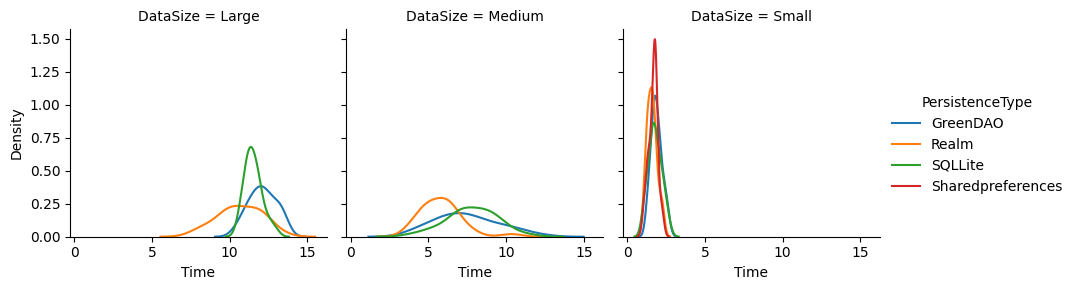

In [25]:
g = sns.FacetGrid(android_persistence, col="DataSize", hue="PersistenceType")
g = g.map(sns.kdeplot, "Time")
g.add_legend()

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [33]:
print(android_persistence.Time.mean())
print(android_persistence.Time.std())

print(android_persistence.groupby(['DataSize']).Time.mean())
print(android_persistence.groupby(['DataSize']).Time.std())

print(android_persistence.groupby(['PersistenceType']).Time.mean())
print(android_persistence.groupby(['PersistenceType']).Time.std())

print(android_persistence.groupby(['DataSize', 'PersistenceType']).Time.mean())
print(android_persistence.groupby(['DataSize', 'PersistenceType']).Time.std())


6.230833333333333
4.229598639871586
DataSize
Large     11.425667
Medium     7.022000
Small      1.741333
Name: Time, dtype: float64
DataSize
Large     1.163785
Medium    1.864335
Small     0.358625
Name: Time, dtype: float64
PersistenceType
GreenDAO             7.152667
Realm                6.022889
SQLLite              7.036000
Sharedpreferences    1.673667
Name: Time, dtype: float64
PersistenceType
GreenDAO             4.385917
Realm                3.884175
SQLLite              4.146336
Sharedpreferences    0.285192
Name: Time, dtype: float64
DataSize  PersistenceType  
Large     GreenDAO             12.110333
          Realm                10.651667
          SQLLite              11.515000
          Sharedpreferences          NaN
Medium    GreenDAO              7.454000
          Realm                 5.818000
          SQLLite               7.794000
          Sharedpreferences          NaN
Small     GreenDAO              1.893667
          Realm                 1.599000
          S

## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
